In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('../in/data_train.csv').rename(columns = {'row':'user','col':'item','data':'rating'})
ratings.head()

,user,item,rating
0,0,10080,1.0
1,0,19467,1.0
2,1,2665,1.0
3,1,7494,1.0
4,1,17068,1.0


The average number of ratings per user is: 14.252925632314081
The median of the number of ratings per user is: 6.0


<AxesSubplot:xlabel='number of ratings', ylabel='number of users'>

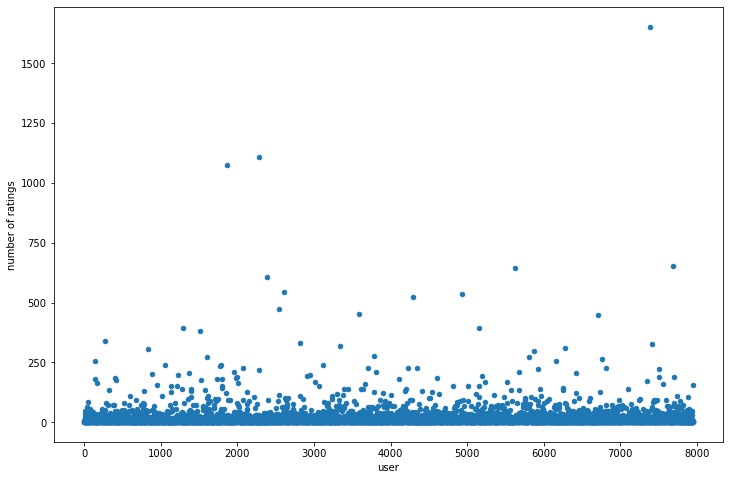

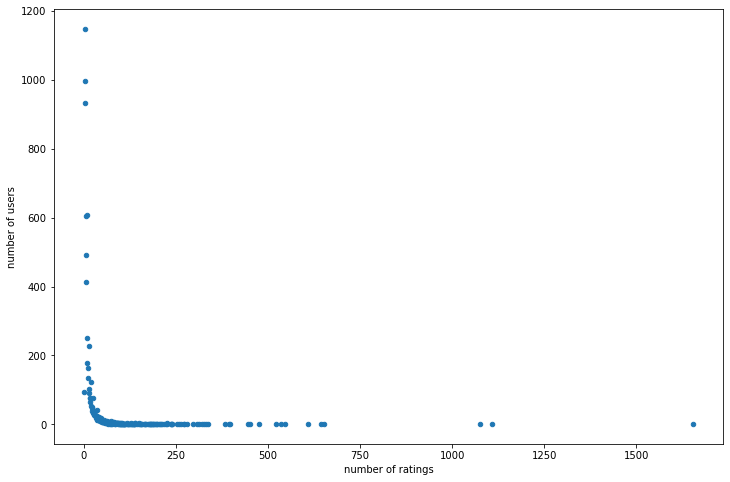

In [3]:
num_ratings_per_user = ratings.groupby('user').count()['rating']
print('The average number of ratings per user is: {}'.format(num_ratings_per_user.mean()))
print('The median of the number of ratings per user is: {}'.format(num_ratings_per_user.median()))

num_ratings_per_user = num_ratings_per_user.reset_index(level=['user'])
num_ratings_per_user=num_ratings_per_user.rename(columns = {'rating':'number of ratings'})

num_users_per_num_ratings = num_ratings_per_user.groupby('number of ratings').count().reset_index(level=['number of ratings']).rename(columns = {'user':'number of users'})

num_ratings_per_user.plot(
    kind='scatter',
    x='user',
    y='number of ratings',
    figsize=(12,8)
)

num_users_per_num_ratings.plot(
    kind='scatter',
    x='number of ratings',
    y='number of users',
    figsize=(12,8)
)

The average number of ratings per item is: 4.549646529562982


<AxesSubplot:xlabel='number of ratings', ylabel='number of items'>

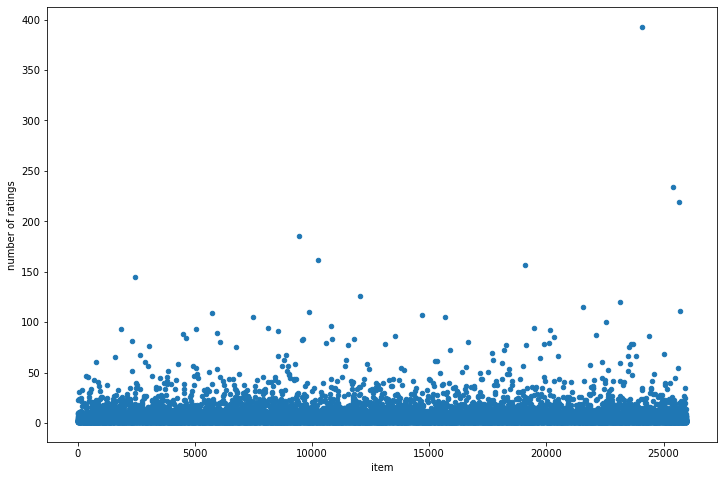

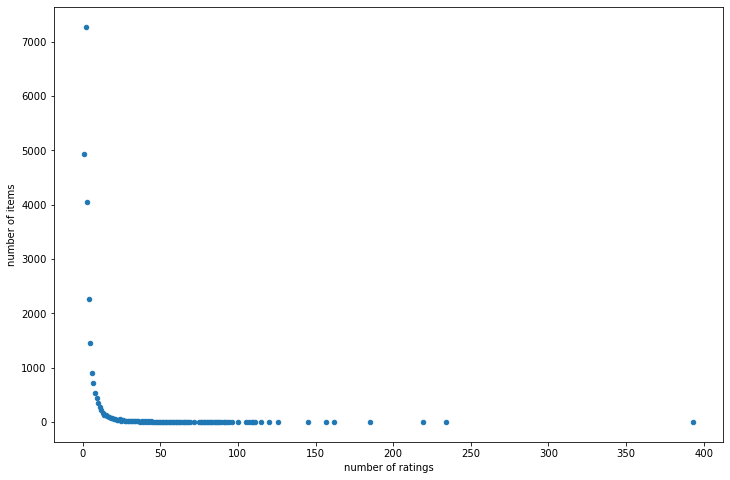

In [4]:
num_ratings_per_item = ratings.groupby('item').count()['rating']

print('The average number of ratings per item is: {}'.format(num_ratings_per_item.mean()))

num_ratings_per_item = num_ratings_per_item.reset_index(level=['item'])
num_ratings_per_item=num_ratings_per_item.rename(columns = {'rating':'number of ratings'})

num_items_per_num_ratings = num_ratings_per_item.groupby('number of ratings').count().reset_index(level=['number of ratings']).rename(columns = {'item':'number of items'})

num_ratings_per_item.plot(
    kind='scatter',
    x='item',
    y='number of ratings',
    figsize=(12,8)
)

num_items_per_num_ratings.plot(
    kind='scatter',
    x='number of ratings',
    y='number of items',
    figsize=(12,8)
)

In [5]:
item_content = pd.read_csv('../in/data_ICM_title_abstract.csv').rename(columns = {'row':'item','col':'feature','data':'weight'})
item_content.head()

,item,feature,weight
0,0,1185,1.015524
1,0,2507,0.459024
2,0,3534,0.227742
3,0,8766,0.501549
4,0,10862,0.297011


In [6]:
print('The average number of features per item is: {}'.format(item_content.groupby('item').count()['feature'].mean()))
print('The average weight of a feature is: {}'.format(item_content['weight'].mean()))

The average number of features per item is: 18.909094412331406
The average weight of a feature is: 0.30735328283833235


In [7]:
from src.Utils.load_URM import load_URM

URM = load_URM('../in/data_train.csv')

In [14]:
print(
    'The sparsity of the matrix is: {:.2f}%'
        .format(
        (1 - URM.nnz/(URM.shape[0]*URM.shape[1]))*100
                )
)

The sparsity of the matrix is: 99.95%
